In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import _functions_sql as fs

In [2]:
# import from database
df_prod_emis = fs.get_dataframe("SELECT *, case when emissions_co2eq_in_kt is null then emissions_co2eq_calc_in_kt else emissions_co2eq_in_kt end as emissions_co2eq_combined_in_kt from production_and_emissions")

In [3]:
df_prod_emis['prod_pop'] = df_prod_emis['production_in_t'] / df_prod_emis['population']
df_prod_emis['emis_pop'] = df_prod_emis['emissions_co2eq_combined_in_kt'] / df_prod_emis['population']
df_prod_emis = df_prod_emis[df_prod_emis['item_category'] != 'Live Animals']
df_prod_emis = df_prod_emis[df_prod_emis['area'] != 'China']

In [4]:
df_prod_emis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201337 entries, 0 to 1342690
Data columns (total 27 columns):
 #   Column                                           Non-Null Count    Dtype  
---  ------                                           --------------    -----  
 0   area                                             1201337 non-null  object 
 1   area_group                                       1201337 non-null  object 
 2   year                                             1201337 non-null  int64  
 3   population                                       1201337 non-null  int64  
 4   item                                             1201337 non-null  object 
 5   item_code                                        1201337 non-null  int64  
 6   item_group                                       1201337 non-null  object 
 7   item_category                                    1201337 non-null  object 
 8   area_harvested_in_ha                             1201337 non-null  float64
 9   stocks_

## World food production

In [23]:
world_production = df_prod_emis[(df_prod_emis.area == 'World') & (df_prod_emis.year != 2021)]

In [24]:
item_categories = world_production.item_category.unique().tolist()
item_groups_crops_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Crops, primary')].item_group.unique().tolist()
item_groups_livestock_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock primary')].item_group.unique().tolist()
item_groups_livestock_processed = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock processed')].item_group.unique().tolist()

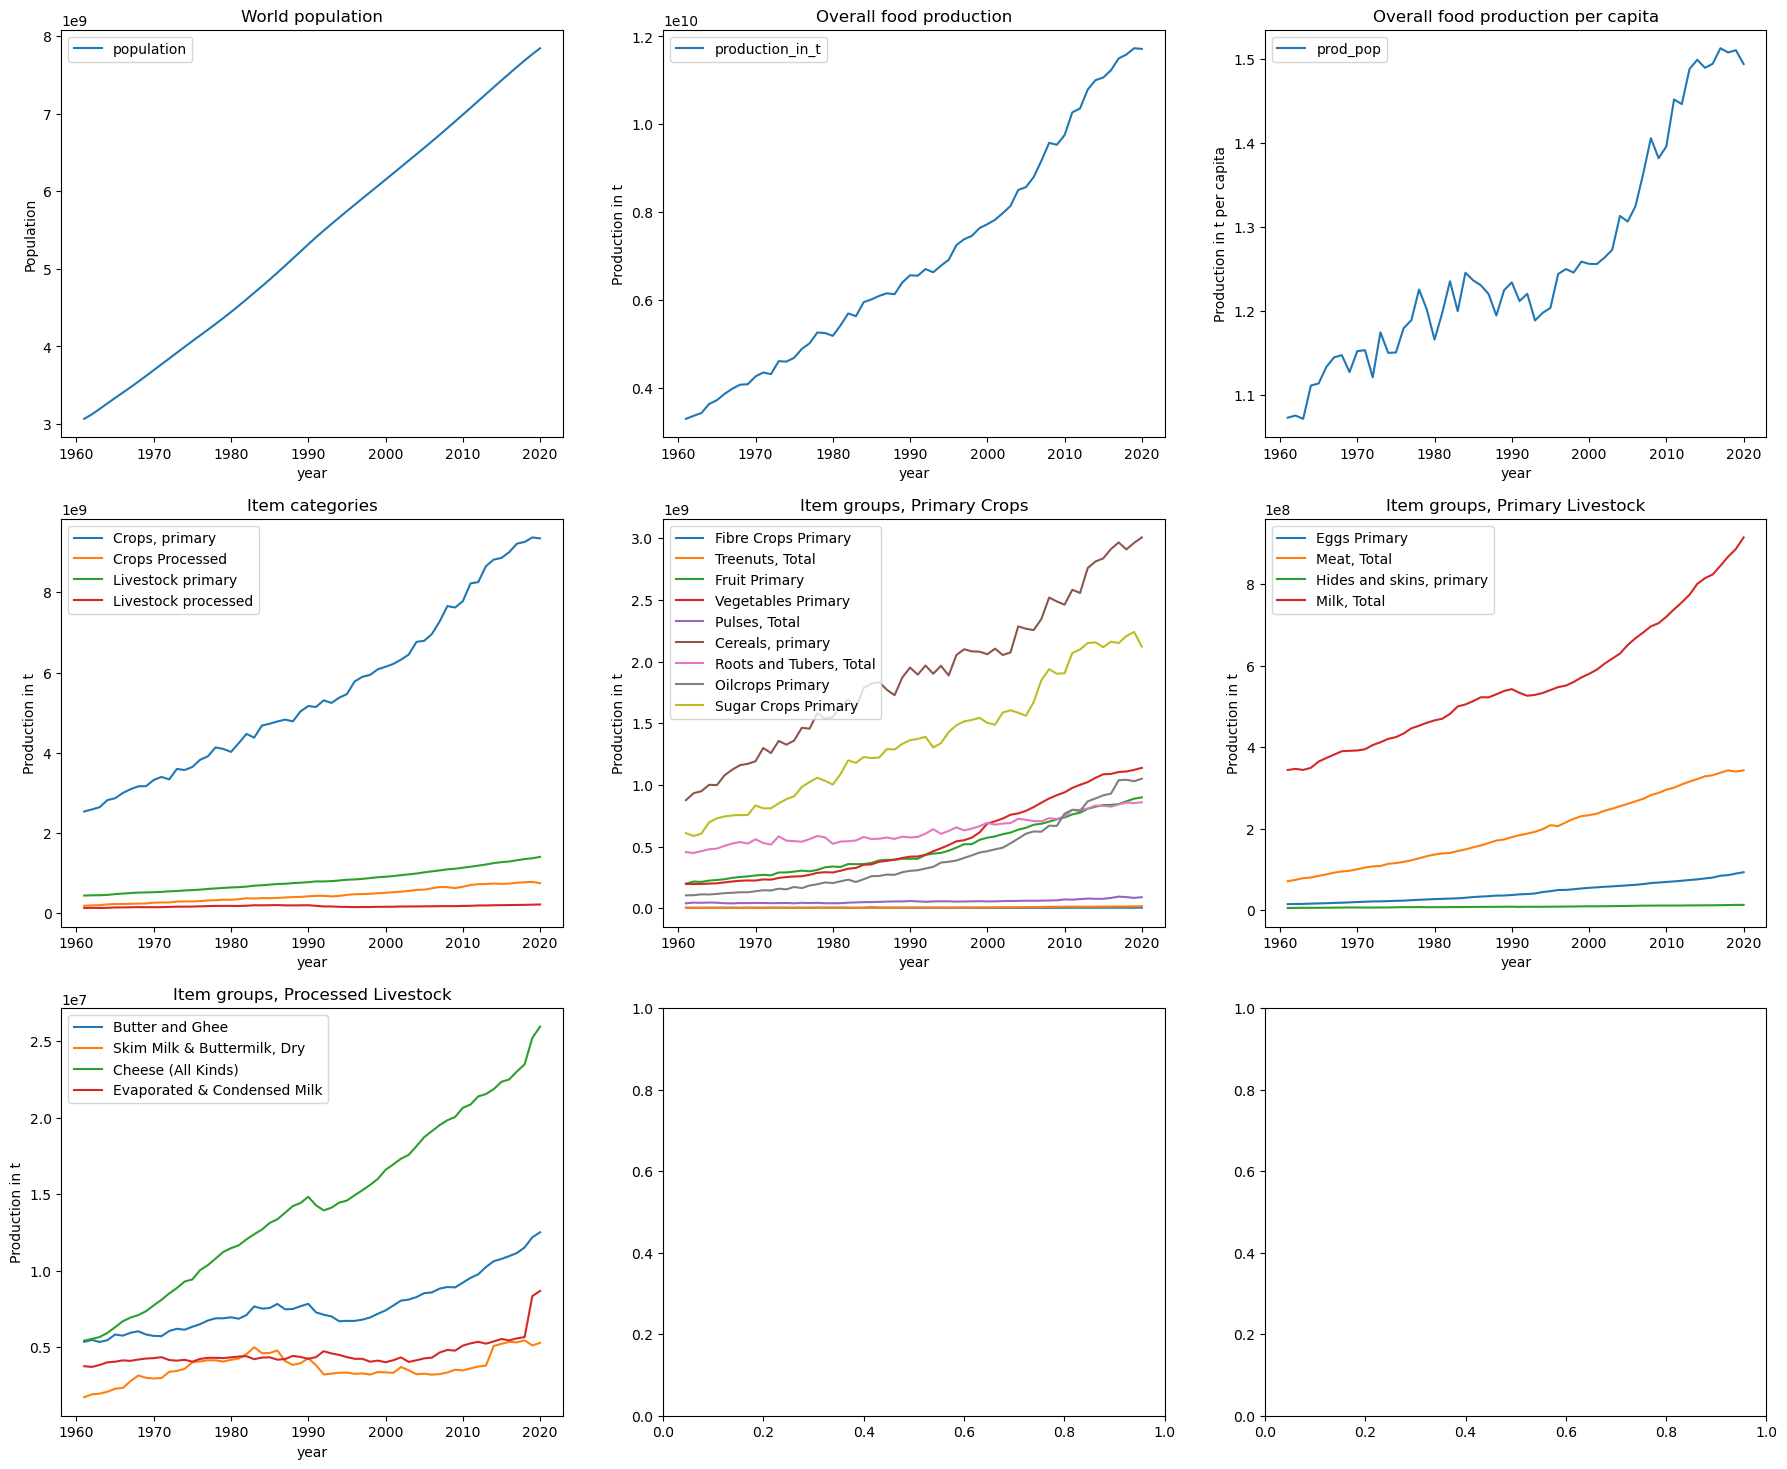

In [25]:
world_production_grouped_0 = world_production[['year', 'population']].groupby(['year'], as_index=False).max()
world_production_grouped_1 = world_production[['year', 'production_in_t']].groupby(['year'], as_index=False).sum()
world_production_grouped_2 = world_production[['year', 'prod_pop']].groupby(['year'], as_index=False).sum()
world_production_grouped_3 = world_production[['year', 'item_category', 'production_in_t']].groupby(['year', 'item_category'], as_index=False).sum()
world_production_grouped_4 = world_production[['year', 'item_group', 'production_in_t']].groupby(['year', 'item_group'], as_index=False).sum()

fig, axes = plt.subplots(3, 3, figsize=(22, 18))

world_production_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

world_production_grouped_1.plot(x='year', y='production_in_t', ax=axes[0][1])
axes[0][1].legend()
axes[0][1].set_ylabel('Production in t')
axes[0][1].set_title('Overall food production')

world_production_grouped_2.plot(x='year', y='prod_pop', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Production in t per capita')
axes[0][2].set_title('Overall food production per capita')

# Iterate over item categories
for item_category in item_categories:
    world_production_grouped_3[world_production_grouped_3.item_category == item_category].plot(x='year', y='production_in_t', ax=axes[1][0], label=item_category)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Production in t')
    axes[1][0].set_title('Item categories')

# Iterate over item groups for primary crops
for item_group in item_groups_crops_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[1][1], label=item_group)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Production in t')
    axes[1][1].set_title('Item groups, Primary Crops')

# Iterate over item groups for primary livestock
for item_group in item_groups_livestock_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[1][2], label=item_group)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Production in t')
    axes[1][2].set_title('Item groups, Primary Livestock')

# Iterate over item groups for processed livestock
for item_group in item_groups_livestock_processed:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][0], label=item_group)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Production in t')
    axes[2][0].set_title('Item groups, Processed Livestock')

In [26]:
prod_emis_world_production_2020 = world_production[df_prod_emis.year == 2020]

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_6339/1560516171.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prod_emis_world_production_2020 = world_production[df_prod_emis.year == 2020]


Text(0, 0.5, 'Production in t')

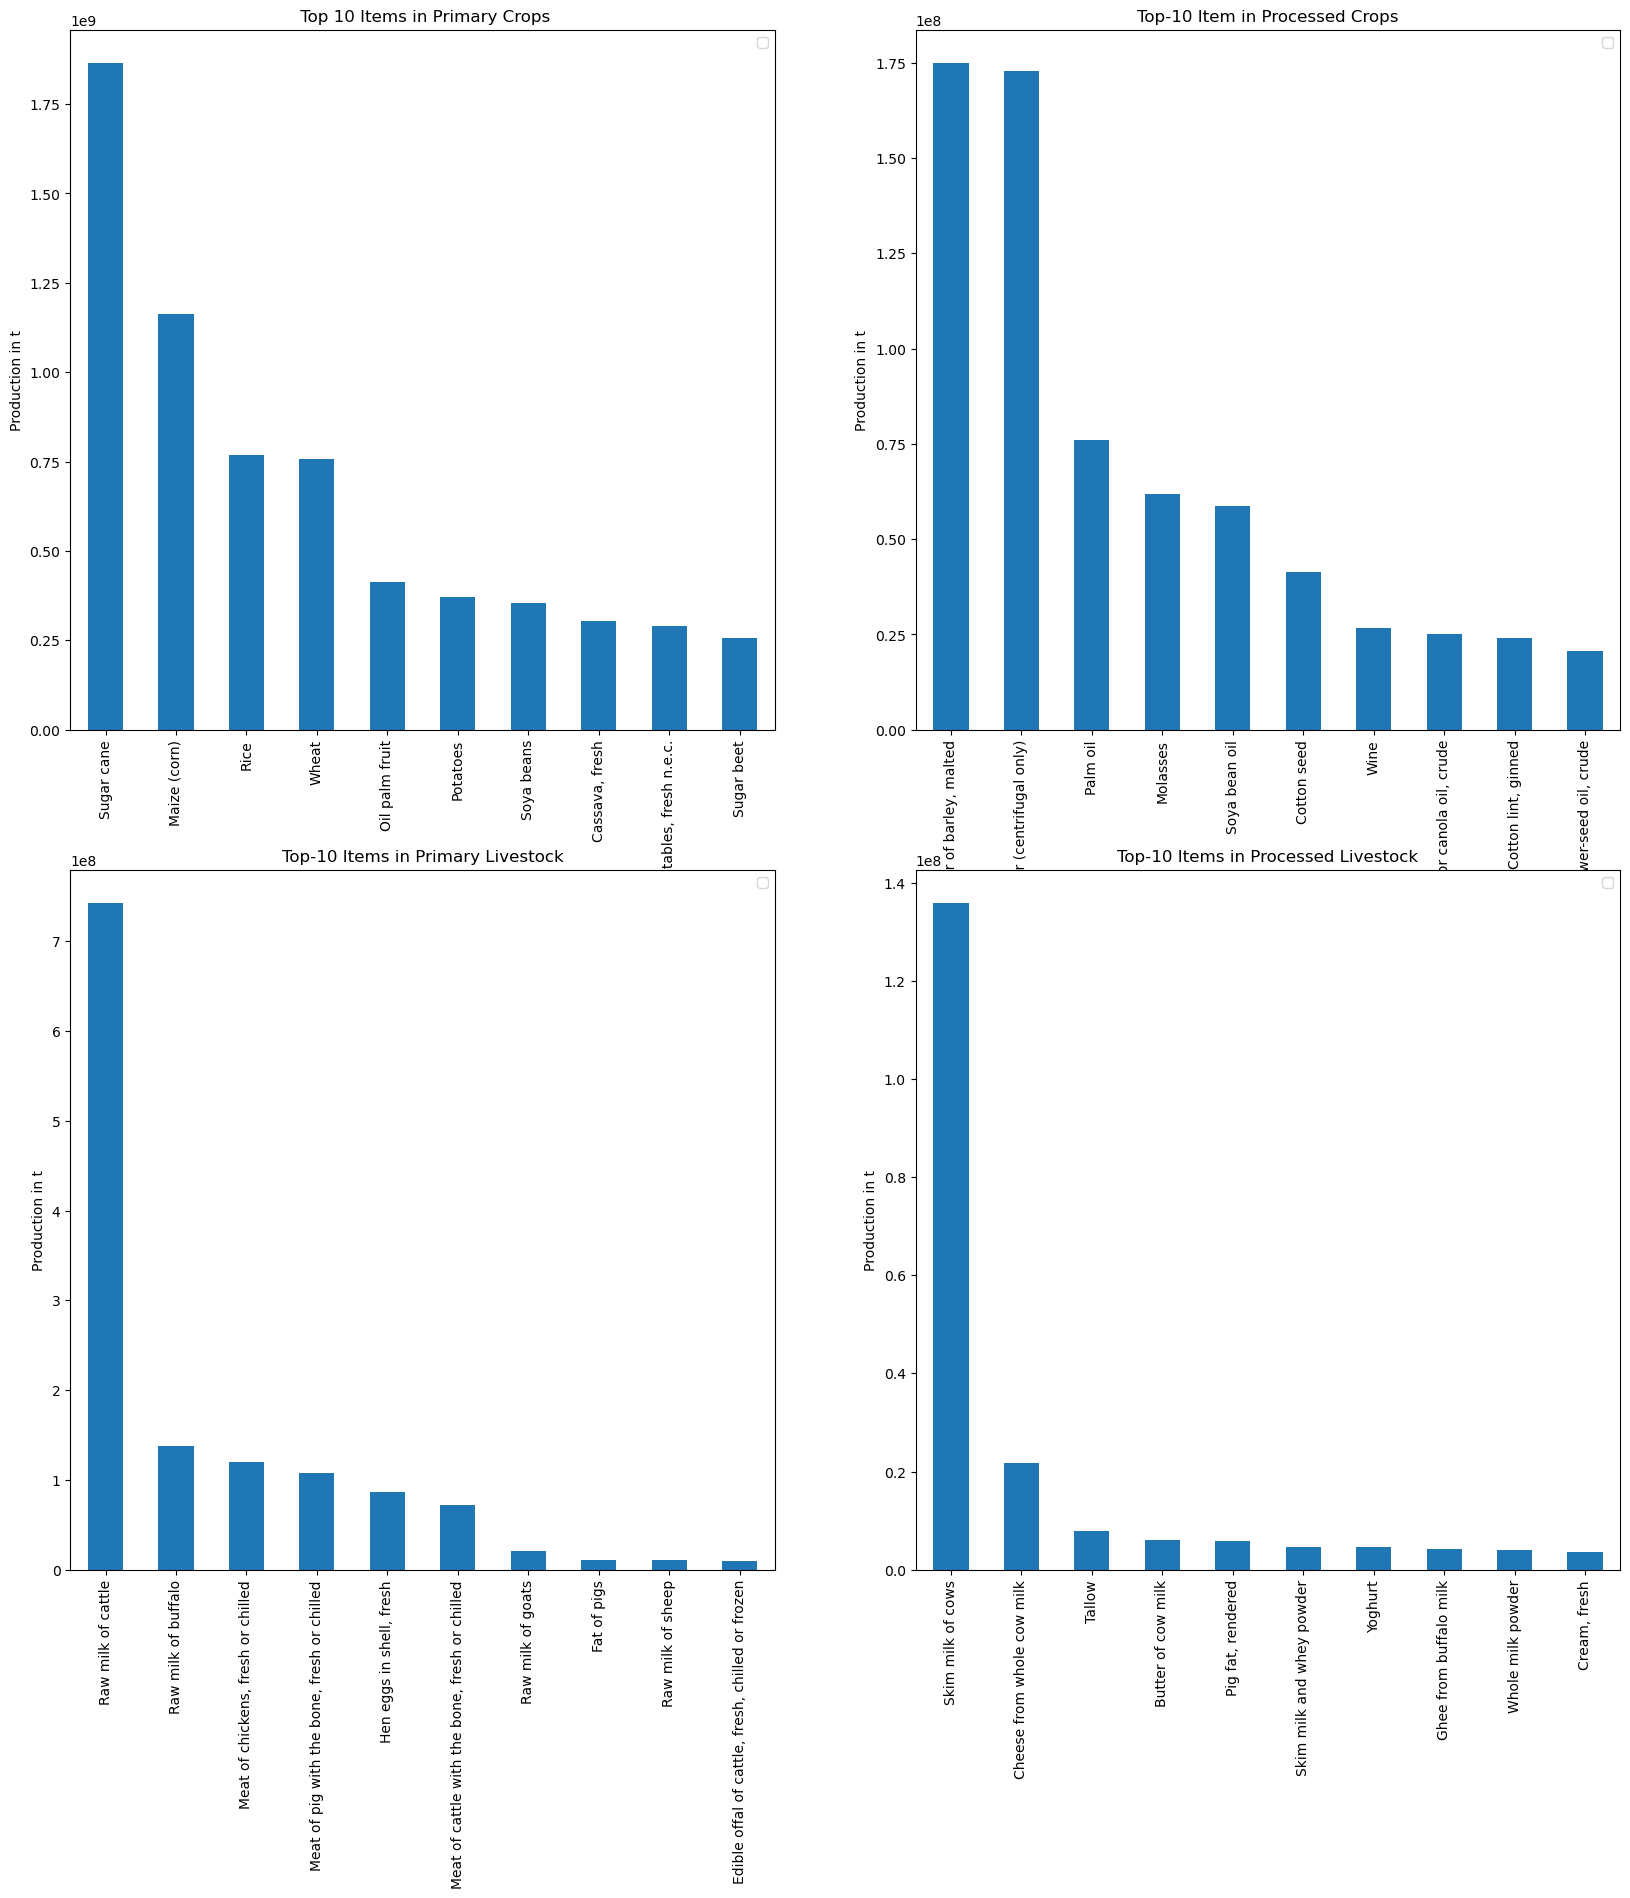

In [27]:
prod_emis_world_production_2020_grouped_1 = prod_emis_world_production_2020[prod_emis_world_production_2020.item_category == 'Crops, primary']
prod_emis_world_production_2020_grouped_1 = prod_emis_world_production_2020_grouped_1[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)

prod_emis_world_production_2020_grouped_2 = prod_emis_world_production_2020[prod_emis_world_production_2020.item_category == 'Crops Processed']
prod_emis_world_production_2020_grouped_2 = prod_emis_world_production_2020_grouped_2[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)

prod_emis_world_production_2020_grouped_3 = prod_emis_world_production_2020[prod_emis_world_production_2020.item_category == 'Livestock primary']
prod_emis_world_production_2020_grouped_3 = prod_emis_world_production_2020_grouped_3[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)

prod_emis_world_production_2020_grouped_4 = prod_emis_world_production_2020[prod_emis_world_production_2020.item_category == 'Livestock processed']
prod_emis_world_production_2020_grouped_4 = prod_emis_world_production_2020_grouped_4[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)

# Plot the top-10 agricultural emissions producers
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

prod_emis_world_production_2020_grouped_1.head(10).plot.bar(x='item', y='production_in_t', ax=axes[0][0])
axes[0][0].set_title(' Top 10 Items in Primary Crops')
axes[0][0].set_xlabel('')
axes[0][0].legend('')
axes[0][0].set_ylabel('Production in t')

prod_emis_world_production_2020_grouped_2.head(10).plot.bar(x='item', y='production_in_t', ax=axes[0][1])
axes[0][1].set_title('Top-10 Item in Processed Crops')
axes[0][1].set_xlabel('')
axes[0][1].legend('')
axes[0][1].set_ylabel('Production in t')

prod_emis_world_production_2020_grouped_3.head(10).plot.bar(x='item', y='production_in_t', ax=axes[1][0])
axes[1][0].set_title('Top-10 Items in Primary Livestock')
axes[1][0].set_xlabel('')
axes[1][0].legend('')
axes[1][0].set_ylabel('Production in t')

prod_emis_world_production_2020_grouped_4.head(10).plot.bar(x='item', y='production_in_t', ax=axes[1][1])
axes[1][1].set_title('Top-10 Items in Processed Livestock')
axes[1][1].set_xlabel('')
axes[1][1].legend('')
axes[1][1].set_ylabel('Production in t')

## World emissions by food production

In [28]:
prod_emis_world_emissions = df_prod_emis[(df_prod_emis.area == 'World') & (df_prod_emis.year != 2021) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

In [29]:
prod_emis_world_emissions.head()

,area,area_group,year,population,item,item_code,item_group,item_category,area_harvested_in_ha,stocks_in_an,...,emissions_co2eq_calc_in_kt,emissions_intensity_calc_in_kg_co2eq_per_kg,source_emissions,emissions_co2eq_in_kt,emissions_intensity_in_kg_co2eq_per_kg,production_emissions_in_t,emissions_intensity_combined_in_kg_co2eq_per_kg,emissions_co2eq_combined_in_kt,prod_pop,emis_pop
743357,World,yes,1961,3068370619,Barley,44,"Cereals, primary","Crops, primary",54518640.0,0.0,...,6118.5360,0.0751,FAO TIER 1,NaN,NaN,NaN,0.0751,6118.5360,0.023599,1.994067e-06
743358,World,yes,1961,3068370619,"Beans, dry",176,"Pulses, Total","Crops, primary",22766818.0,0.0,...,1302.0812,0.1031,FAO TIER 1,NaN,NaN,NaN,0.1031,1302.0812,0.003659,4.243559e-07
743433,World,yes,1961,3068370619,"Hen eggs in shell, fresh",1062,Eggs Primary,Livestock primary,0.0,0.0,...,NaN,NaN,None,15821.5796,0.9871,16028524.09,0.9871,15821.5796,0.004688,5.156346e-06
743451,World,yes,1961,3068370619,Maize (corn),56,"Cereals, primary","Crops, primary",105559557.0,0.0,...,21505.3006,0.0976,FAO TIER 1,NaN,NaN,NaN,0.0976,21505.3006,0.066820,7.008704e-06
743456,World,yes,1961,3068370619,"Meat of buffalo, fresh or chilled",947,"Meat, Total",Livestock primary,0.0,0.0,...,NaN,NaN,None,134936.7472,125.9733,1071153.72,125.9733,134936.7472,0.000349,4.397668e-05


### Total emissions in kt

In [33]:
item_categories = prod_emis_world_emissions.item_category.unique().tolist()
item_groups = prod_emis_world_emissions.item_group.unique().tolist()
items = prod_emis_world_emissions.item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk_eggs = list(filter(lambda x: 'Raw milk' in x or 'Hen eggs' in x, items))
rice_wheat_maize = list(filter(lambda x: 'Rice' in x or 'Wheat' in x or 'Maize' in x, items))
remaining = list(set(items) - set(meat + milk_eggs + rice_wheat_maize))

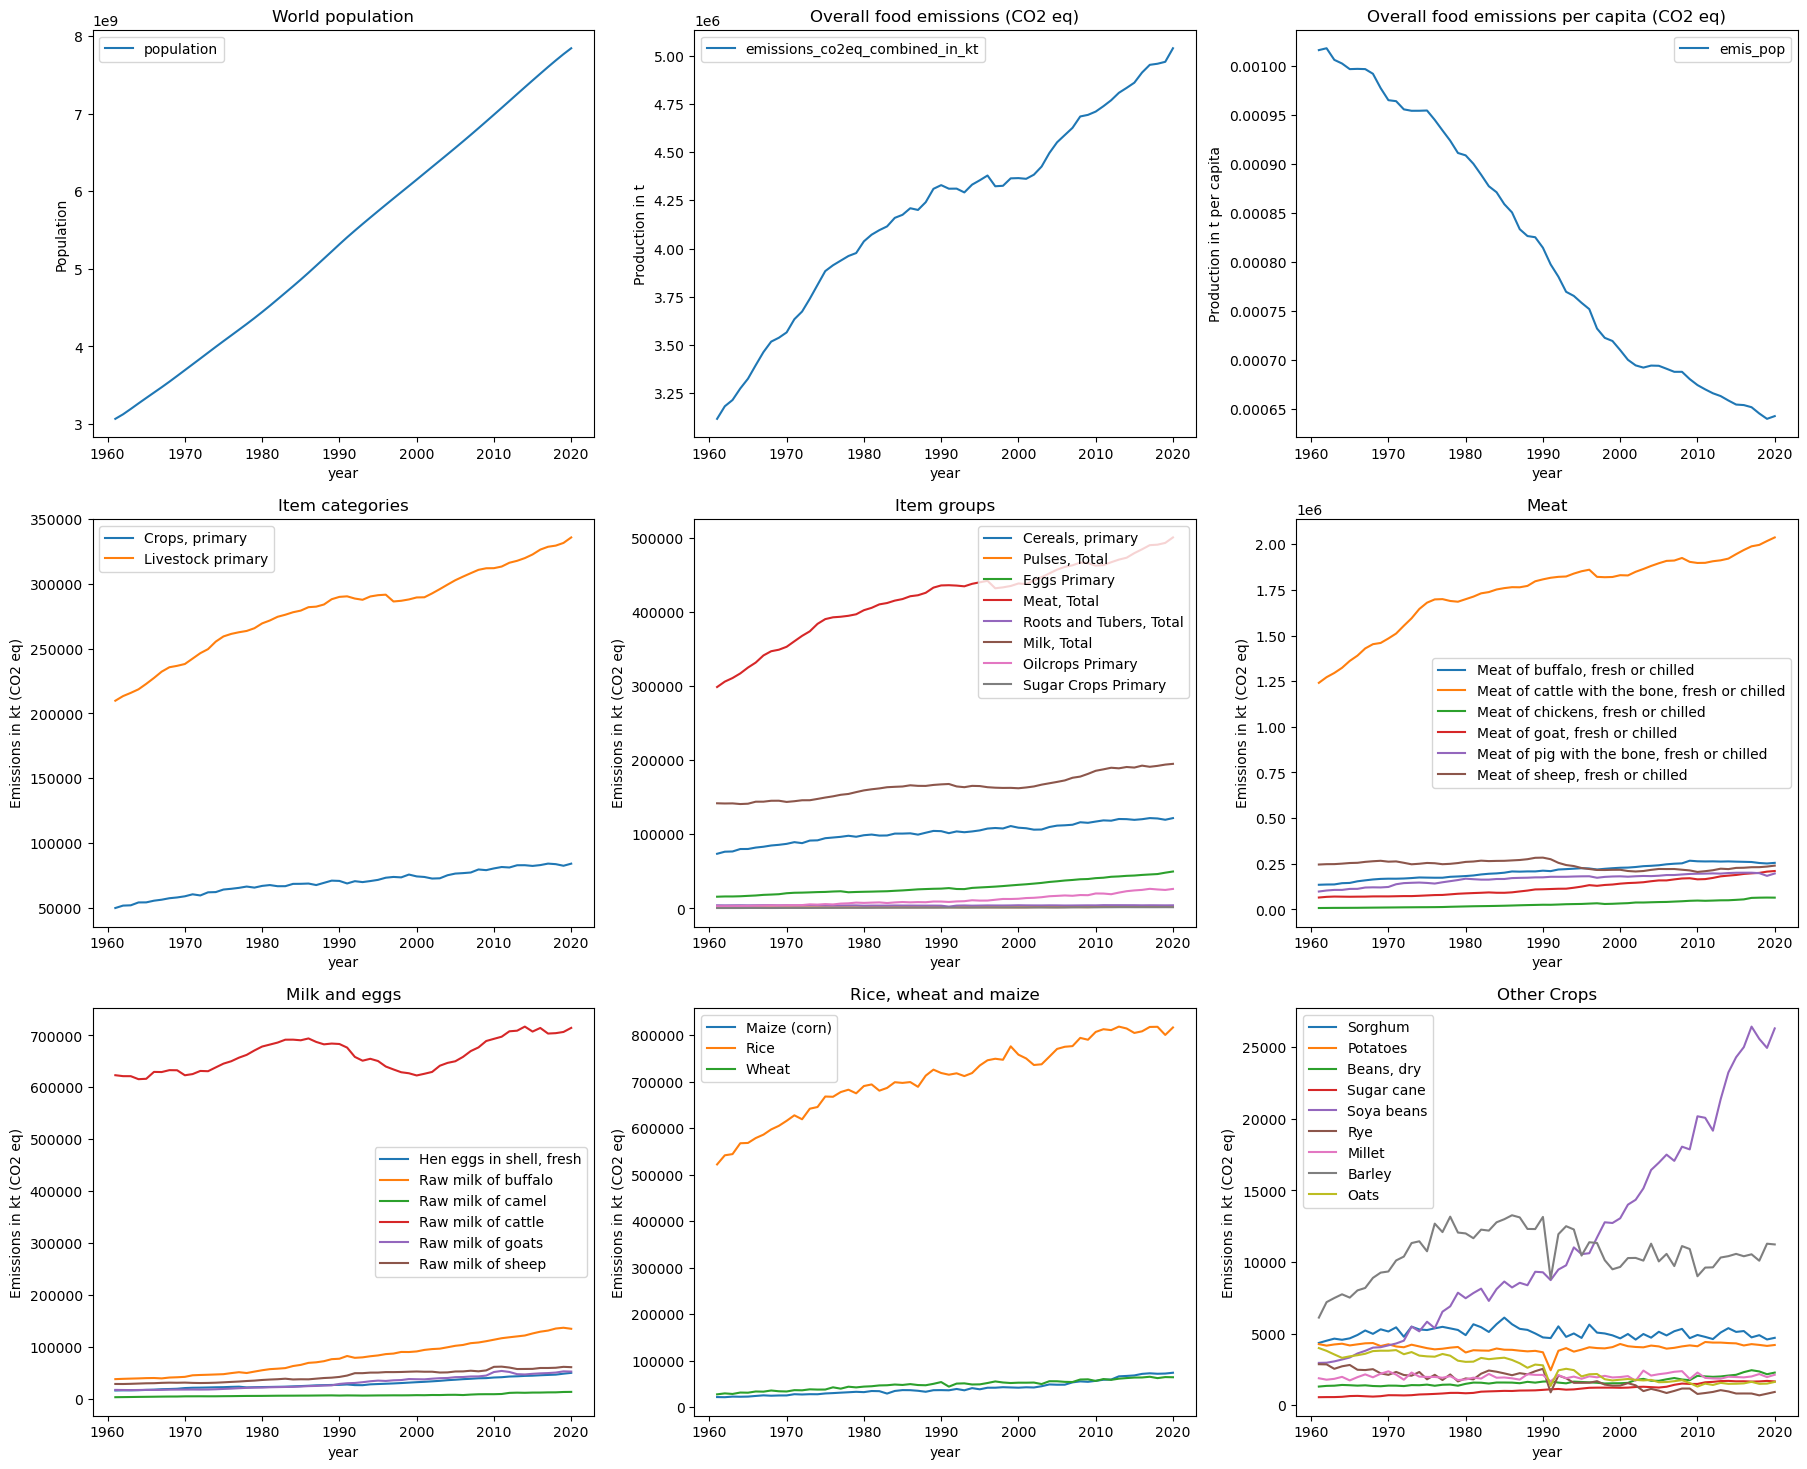

In [34]:
prod_emis_world_emissions_grouped_0 = prod_emis_world_emissions[['year', 'population']].groupby(['year'], as_index=False).max()
prod_emis_world_emissions_grouped_5 = prod_emis_world_emissions[['year', 'emissions_co2eq_combined_in_kt']].groupby(['year'], as_index=False).sum()
prod_emis_world_emissions_grouped_6 = prod_emis_world_emissions[['year', 'emis_pop']].groupby(['year'], as_index=False).sum()
prod_emis_world_emissions_grouped_1 = prod_emis_world_emissions[['item_category', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('mean')
prod_emis_world_emissions_grouped_2 = prod_emis_world_emissions[['item_group', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_group', 'year'], as_index=False).agg('mean')
prod_emis_world_emissions_grouped_3 = prod_emis_world_emissions[['item', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(3, 3, figsize=(22, 18))

prod_emis_world_emissions_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

prod_emis_world_emissions_grouped_5.plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].legend()
axes[0][1].set_ylabel('Production in t')
axes[0][1].set_title('Overall food emissions (CO2 eq)')

prod_emis_world_emissions_grouped_6.plot(x='year', y='emis_pop', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Production in t per capita')
axes[0][2].set_title('Overall food emissions per capita (CO2 eq)')

# Iterate over item categories
for item_category in item_categories:
    prod_emis_world_emissions_grouped_1[prod_emis_world_emissions_grouped_1.item_category == item_category].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][0], label=item_category)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][0].set_title('Item categories')

# Iterate over item groups
for item_group in item_groups:
    prod_emis_world_emissions_grouped_2[prod_emis_world_emissions_grouped_2.item_group == item_group].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][1], label=item_group)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][1].set_title('Item groups')

    # Iterate over meat items
for item in meat:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][2].set_title('Meat')

# Iterate over milk items
for item in milk_eggs:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][0], label=item)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][0].set_title('Milk and eggs')

# Iterate over eggs and rice items
for item in rice_wheat_maize:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][1], label=item)
    axes[2][1].legend()
    axes[2][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][1].set_title('Rice, wheat and maize')

    
# Iterate over remaining items
for item in remaining:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][2], label=item)
    axes[2][2].legend()
    axes[2][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][2].set_title('Other Crops')

### Emission intensity

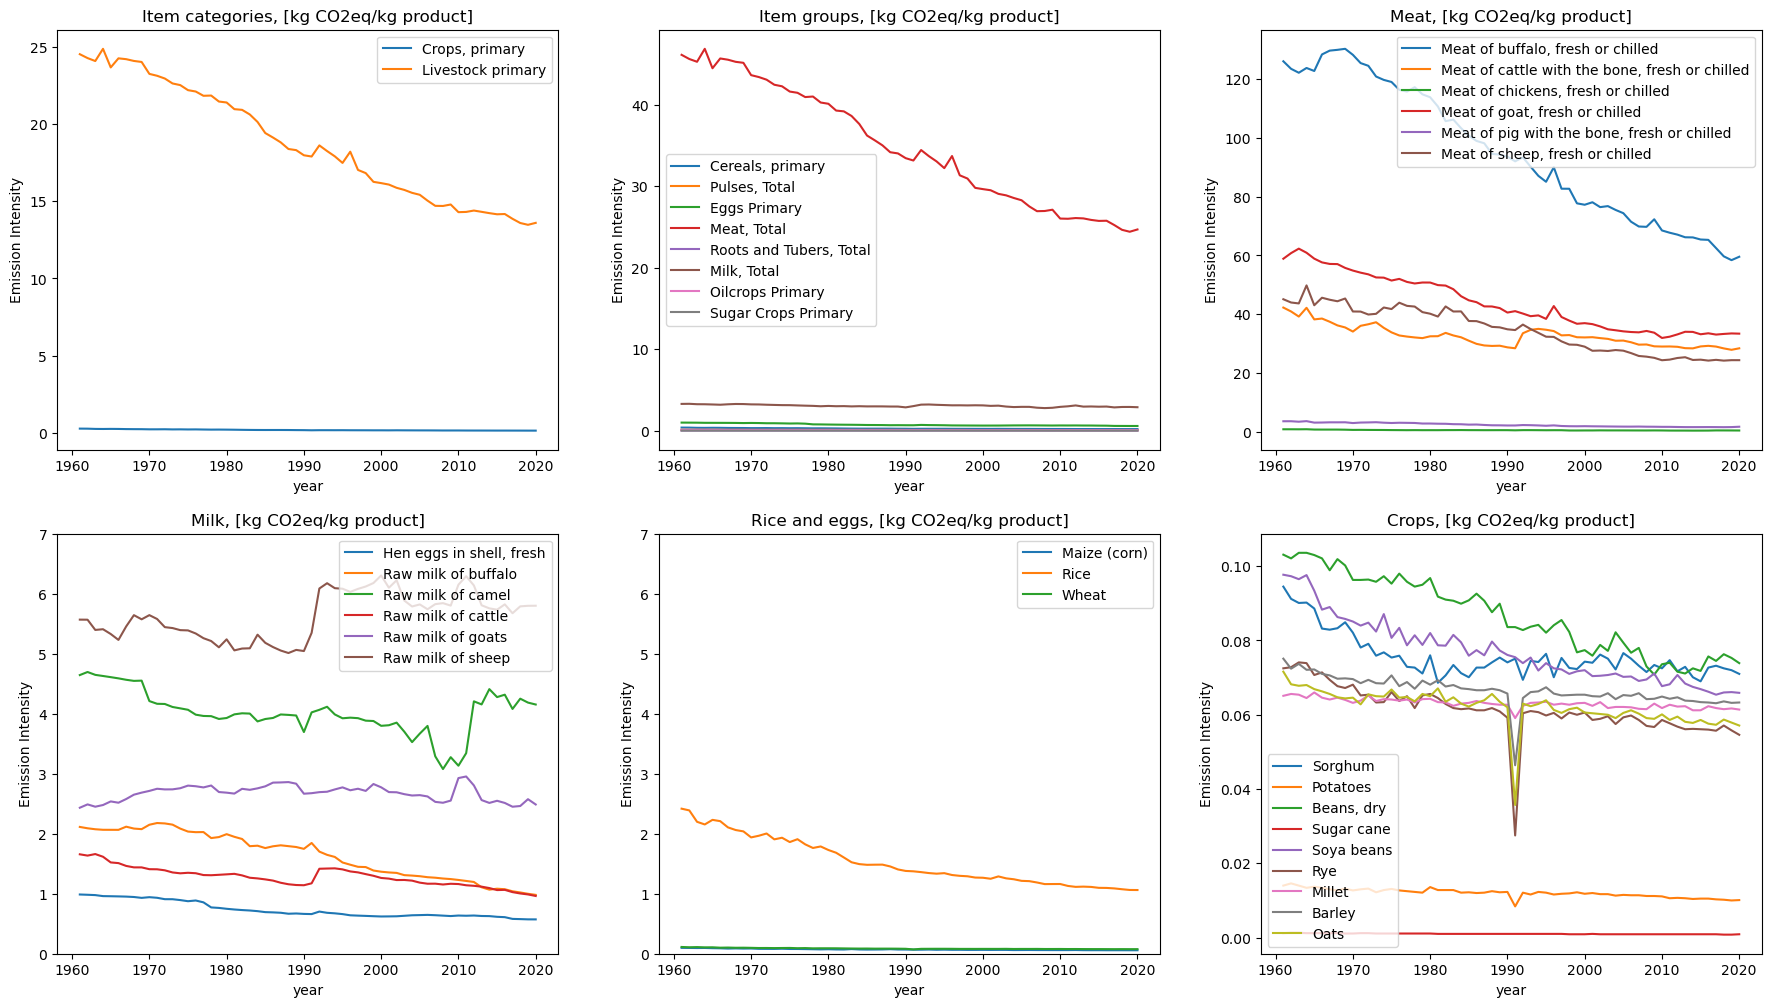

In [35]:
prod_emis_world_emissions_grouped_1 = prod_emis_world_emissions[['item_category', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_category', 'year'], as_index=False).agg('mean')
prod_emis_world_emissions_grouped_2 = prod_emis_world_emissions[['item_group', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_group', 'year'], as_index=False).agg('mean')
prod_emis_world_emissions_grouped_3 = prod_emis_world_emissions[['item', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(2, 3, figsize=(22, 12))

# Iterate over item categories
for item_category in item_categories:
    prod_emis_world_emissions_grouped_1[prod_emis_world_emissions_grouped_1.item_category == item_category].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][0], label=item_category)
    axes[0][0].legend()
    axes[0][0].set_ylabel('Emission Intensity')
    axes[0][0].set_title('Item categories, [kg CO2eq/kg product]')

# Iterate over item groups
for item_group in item_groups:
    prod_emis_world_emissions_grouped_2[prod_emis_world_emissions_grouped_2.item_group == item_group].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][1], label=item_group)
    axes[0][1].legend()
    axes[0][1].set_ylabel('Emission Intensity')
    axes[0][1].set_title('Item groups, [kg CO2eq/kg product]')

    # Iterate over meat items
for item in meat:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][2], label=item)
    axes[0][2].legend()
    axes[0][2].set_ylabel('Emission Intensity')
    axes[0][2].set_title('Meat, [kg CO2eq/kg product]')

# Iterate over milk items
for item in milk_eggs:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][0], label=item)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emission Intensity')
    axes[1][0].set_title('Milk, [kg CO2eq/kg product]')
    axes[1][0].set_ylim([0,7])

# Iterate over eggs and rice items
for item in rice_wheat_maize:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][1], label=item)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emission Intensity')
    axes[1][1].set_title('Rice and eggs, [kg CO2eq/kg product]')
    axes[1][1].set_ylim([0,7])
    
# Iterate over remaining items
for item in remaining:
    prod_emis_world_emissions_grouped_3[prod_emis_world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emission Intensity')
    axes[1][2].set_title('Crops, [kg CO2eq/kg product]')

## Analysis for 2020

### Country comparison - production and emissions

In [18]:
prod_emis_countries = df_prod_emis[(df_prod_emis.area_group == 'no') & (df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

In [19]:
countries = prod_emis_countries.area.unique().tolist()
item_categories = prod_emis_countries.item_category.unique().tolist()

Text(0, 0.5, 'Emissions in kt (co2eq)')

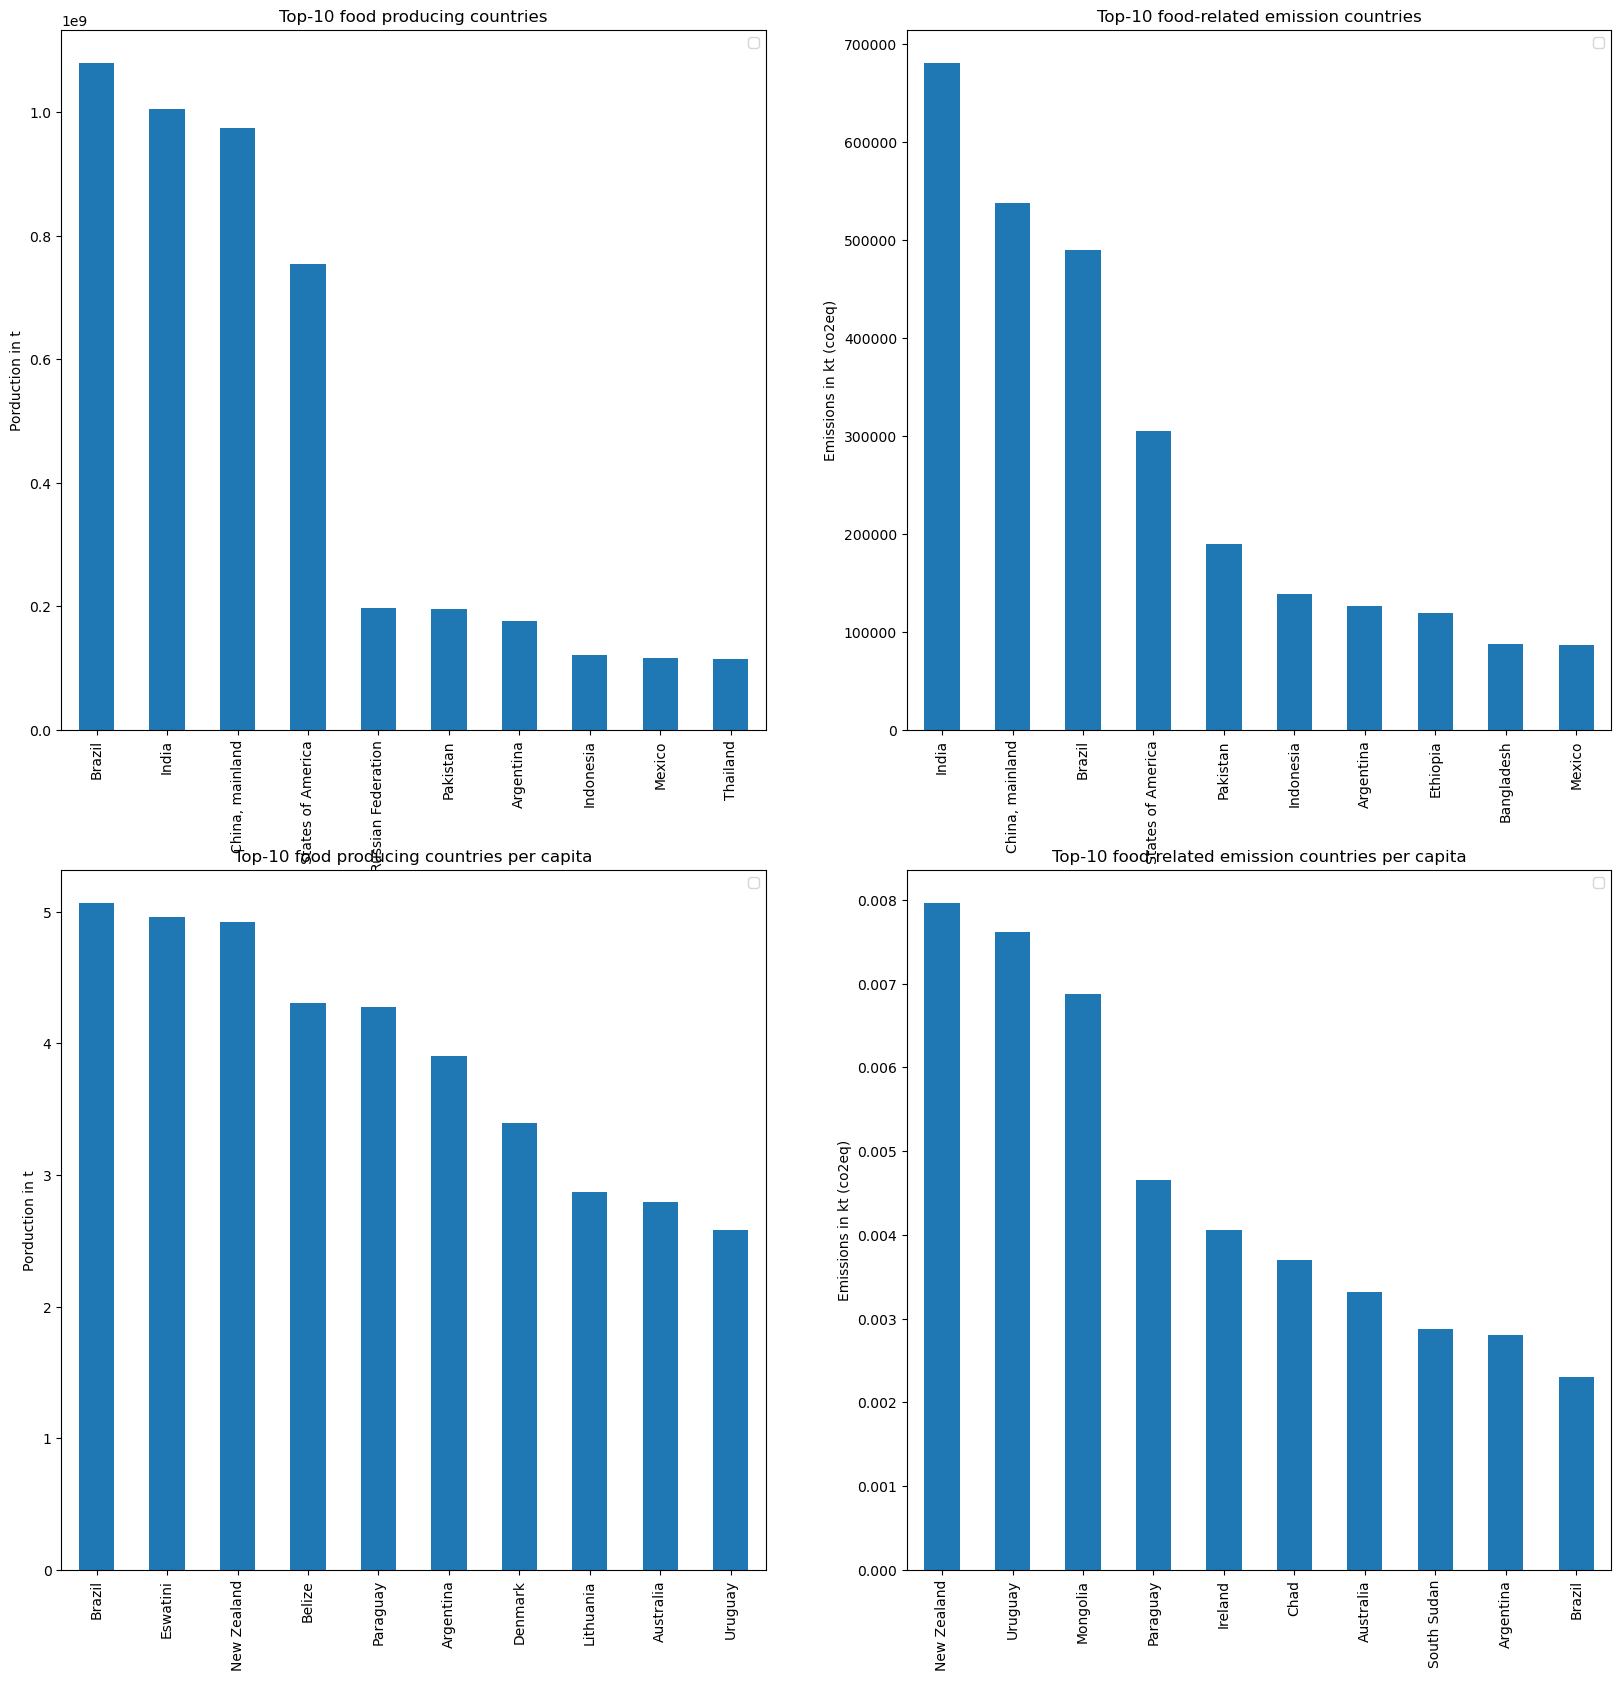

In [20]:
prod_emis_countries_grouped_1 = prod_emis_countries[['area', 'production_in_t']].groupby(['area'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)
prod_emis_countries_grouped_2 = prod_emis_countries[['area', 'prod_pop']].groupby(['area'], as_index=False).agg('sum').sort_values(by='prod_pop', ascending=False)
prod_emis_countries_grouped_3 = prod_emis_countries[['area', 'emissions_co2eq_combined_in_kt']].groupby(['area'], as_index=False).agg('sum').sort_values(by='emissions_co2eq_combined_in_kt', ascending=False)
prod_emis_countries_grouped_4 = prod_emis_countries[['area', 'emis_pop']].groupby(['area'], as_index=False).agg('sum').sort_values(by='emis_pop', ascending=False)

# Plot the top-10 agricultural emissions producers
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

prod_emis_countries_grouped_1.head(10).plot.bar(x='area', y='production_in_t', ax=axes[0][0])
axes[0][0].set_title('Top-10 food producing countries')
axes[0][0].set_xlabel('')
axes[0][0].legend('')
axes[0][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_3.head(10).plot.bar(x='area', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].set_title('Top-10 food-related emission countries')
axes[0][1].set_xlabel('')
axes[0][1].legend('')
axes[0][1].set_ylabel('Emissions in kt (co2eq)')

prod_emis_countries_grouped_2.head(10).plot.bar(x='area', y='prod_pop', ax=axes[1][0])
axes[1][0].set_title('Top-10 food producing countries per capita')
axes[1][0].set_xlabel('')
axes[1][0].legend('')
axes[1][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_4.head(10).plot.bar(x='area', y='emis_pop', ax=axes[1][1])
axes[1][1].set_title('Top-10 food-related emission countries per capita')
axes[1][1].set_xlabel('')
axes[1][1].legend('')
axes[1][1].set_ylabel('Emissions in kt (co2eq)')

### Item comparison - production and emissions

Text(0.5, 1.0, 'Emissions by item group in 2020')

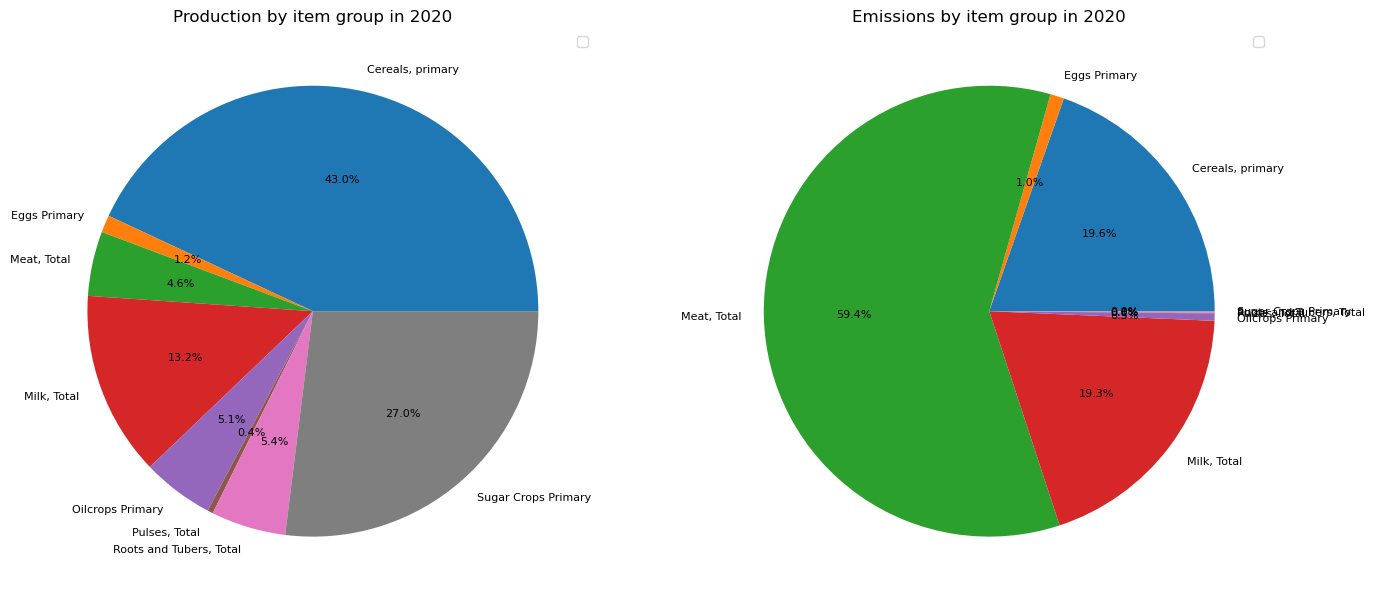

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


prod_emis_countries[['item_group', 'production_in_t']].groupby('item_group').agg('sum').plot.pie(y='production_in_t', 
                                                    ax=axes[0], fontsize=8, autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].legend('')
axes[0].set_title('Production by item group in 2020')

prod_emis_countries[['item_group', 'emissions_co2eq_combined_in_kt']].groupby('item_group').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', 
                                                    ax=axes[1], fontsize=8, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Emissions by item group in 2020')